# Stochastic GD in Logistic Regression 

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

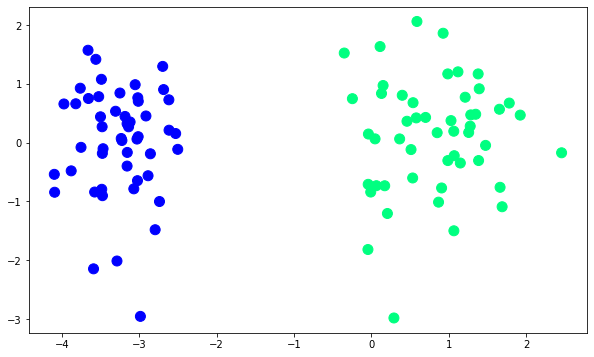

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [3]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [4]:
print(lor.intercept_)
print(lor.coef_)

[5.76418094]
[[4.79511321 0.21084525]]


In [5]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [6]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [7]:
import random

In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [16]:
def SGD(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(3000):
        for j in range(X.shape[0]):
            idx = np.random.randint(0, X.shape[0])
            y_hat = sigmoid(np.dot(X[idx],weights))
            weights = weights + lr*(np.dot((y[idx]-y_hat),X[idx])/X.shape[0])
    
    return weights[1:],weights[0]

In [17]:
coef_, intercept_ = SGD(X, y)

In [11]:
coef_

array([4.21334715, 0.16215449])

In [12]:
intercept_

4.930173176164363

In [18]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [19]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

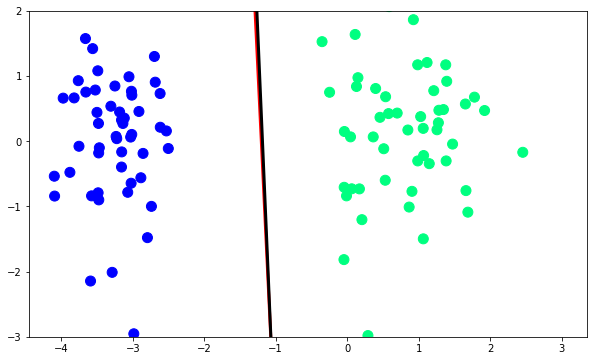

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)